In [54]:
import os

dirname_taxa = '../data/Microbiome/Hyun201708_XENLA_Antibiotic/taxa'
#dirname_taxa = '../data/Microbiome/Hyun201708_XENLA_GutVsBody/taxa'
#dirname_taxa = '../data/Microbiome/Hyun201708_XENLA_AdultDV/taxa'
filename_otu_tbl = 'otu_table_L5.txt'

min_freq = 0.05

f = open( os.path.join( dirname_taxa, filename_otu_tbl), 'r')
f.readline()  ## header

taxa_freq = dict()
sample_list = f.readline().strip().split("\t")[1:]
sample_size = len(sample_list)
for tmp_sample in sample_list:
    #taxa_freq[tmp_sample] = {'MISC':0.0}
    taxa_freq[tmp_sample] = dict()
    
#taxa_list = ['MISC']
taxa_list = []
for line in f:
    tmp_tokens = line.strip().split("\t")
    tmp_taxa_name = tmp_tokens[0]
    tmp_freq_list = [float(x) for x in tmp_tokens[1:]]
    is_misc = 0
    if max(tmp_freq_list) >= min_freq:
        is_misc = 1
        taxa_list.append(tmp_taxa_name)
        
    for i in range(0,sample_size):
        tmp_sample = sample_list[i]
        if is_misc > 0:        
            taxa_freq[tmp_sample][tmp_taxa_name] = tmp_freq_list[i]
        #else:
        #    taxa_freq[tmp_sample]['MISC'] = tmp_freq_list[i]
f.close()

sample_list = sorted(sample_list)
print("TaxaName\t%s"%("\t".join([x.replace('Hyun201708','') for x in sample_list])))
for tmp_taxa_name in sorted(taxa_list):
    tmp_freq_str = "\t".join(['%.3f'%taxa_freq[tmp_s][tmp_taxa_name] for tmp_s in sample_list ])
    print("%s\t%s"%(tmp_taxa_name.split(';')[-1], tmp_freq_str))

TaxaName	XENLATadpoleGutAmp1x	XENLATadpoleGutGen1x
f__Microbacteriaceae	0.069	0.051
f__[Weeksellaceae]	0.003	0.072
f__	0.050	0.079
f__Xanthobacteraceae	0.121	0.048
f__Comamonadaceae	0.037	0.095
f__Pseudomonadaceae	0.518	0.409
f__Xanthomonadaceae	0.167	0.197


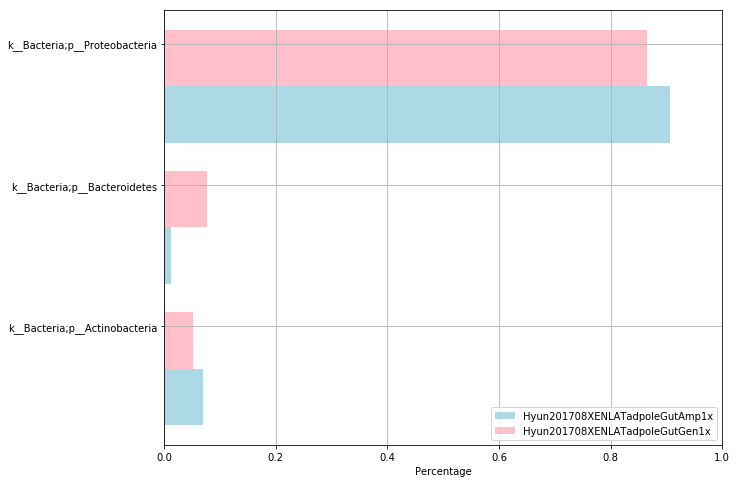

In [53]:
%matplotlib inline

import math
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(1,1,1)
ax1.grid()

#colors = ['orange','pink','darkblue','lightgreen']
#sample_list = ['Hyun201708XENLAAdultDorsal1','Hyun201708XENLAAdultDorsal2','Hyun201708XENLAAdultVentral1','Hyun201708XENLAAdultVentral2']
#sample_list = ['Hyun201708XENTRAdultDorsal1','Hyun201708XENTRAdultDorsal2','Hyun201708XENTRAdultVentral2']
#sample_list = ['Hyun201708XENLAAdultDorsal1','Hyun201708XENLAAdultDorsal2','Hyun201708XENTRAdultDorsal1','Hyun201708XENTRAdultDorsal2']
#sample_list = ['Hyun201708XENLAAdultVentral1','Hyun201708XENLAAdultVentral2','Hyun201708XENTRAdultVentral2']

#colors = ['orange','pink','darkblue','lightgreen']
#sample_list = ['Hyun201708XENLASt41Gut1','Hyun201708XENLASt41Gut2','Hyun201708XENLASt45Gut2','Hyun201708XENLASt45Gut3']
#sample_list = ['Hyun201708XENLASt45Body1','Hyun201708XENLASt45Body2','Hyun201708XENLASt45Gut2','Hyun201708XENLASt45Gut3']
#colors = ['lightblue','lightgreen','darkblue','darkgreen']
#sample_list = ['Hyun201708XENLASt43Body1','Hyun201708XENLASt43Body2','Hyun201708XENLASt45Body1','Hyun201708XENLASt45Body2']

colors = ['lightblue','pink']
sample_list = ['Hyun201708XENLATadpoleGutAmp1x','Hyun201708XENLATadpoleGutGen1x']

bar_pos = 0
#tmp_width = 0.4
tmp_width = 0.4

for tmp_taxa_name in sorted(taxa_list):          
    for tmp_s in range(0,len(sample_list)):
        tmp_sample_name = sample_list[tmp_s]
        tmp_freq = taxa_freq[tmp_sample_name][tmp_taxa_name]
        if bar_pos == 0:
            ax1.barh(bar_pos+tmp_width*tmp_s, tmp_freq, height=tmp_width, label=tmp_sample_name, facecolor=colors[tmp_s])
            #ax1.barh(bar_pos+1.2, tmp_BHI1, height=0.3, label='GamakSite1BHI', facecolor='green')
            #ax1.barh(bar_pos+1.5, tmp_BHI2, height=0.3, label='GamakSite2BHI', facecolor='lightgreen')
        else:
            ax1.barh(bar_pos+tmp_width*tmp_s, tmp_freq, height=tmp_width, facecolor=colors[tmp_s])
    bar_pos += 1

ax1.legend(loc='lower right')
ax1.set_yticks([x+0.5 for x in range(0,len(taxa_list))])
ax1.set_yticklabels(taxa_list)
ax1.set_xlabel('Percentage')
ax1.set_xlim(0,1)
#plt.show()
#plt.savefig('AdultDV_XENLA+XENLA_Dorsal.L5.pdf')

#plt.savefig('GutVsBody_St45Body+St45Gut.L5.pdf')
#plt.savefig('GutVsBody_St41Gut+St45Gut.L2.pdf')

plt.savefig('Antibiotic.L2.pdf')

In [63]:
%matplotlib inline
import math

filename_tbl = 'otu_table_L2.txt'

f_tbl = open(filename_tbl,'r')
f_tbl.readline()

freq_list = dict()
headers = f_tbl.readline().strip().split("\t")
for i in range(1,len(headers)):
    freq_list[ headers[i] ] = []

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)
ax1.grid()

bar_pos = 0
phyla_list = []
pct_list = []
for line in f_tbl:
    tokens = line.strip().split("\t")
    tmp_taxa = tokens[0]
    for i in range(1,len(tokens)):
        freq_list[headers[i]].append( math.log10(float(tokens[i])+1e-6) )
    if( max([float(x) for x in tokens[1:]]) > 0.05 ):
        tmp_phylum = tokens[0].split('__')[2]
        tmp_raw2 = float(tokens[1])
        tmp_raw1 = float(tokens[2])
        tmp_BHI1 = float(tokens[3])
        tmp_LB1 = float(tokens[4])
        tmp_BHI2 = float(tokens[5])
        tmp_LB2 = float(tokens[6])
        
        phyla_list.append(tmp_phylum)
        pct_list.append(tmp_LB1)
f_tbl.close()

ax1.pie(pct_list, labels=phyla_list, autopct='%1.1f%%', shadow=True, startangle=90)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'otu_table_L2.txt'